<a href="https://colab.research.google.com/github/nomnomnonono/CV-paper/blob/main/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.utils import np_utils
import os
import sys
sys.path.append('../')
from functions import setseed, display

In [ ]:
setseed.set_seed(42)

In [ ]:
try:
    __file__
except NameError:
    __file__ = os.path.join(os.getcwd(),"dummy")
else:
    pass

In [ ]:
class MnistDataset:
    def __init__(self):
        self.num_class = 10
        self.img_shape = (28, 28,1)
    
    def preprocess(self, data, label=False):
        if label:
            data = np_utils.to_categorical(data, self.num_class)
        else:
            data = data.astype('float32')
            data /= 255
            data = data.reshape((data.shape[0],)+self.img_shape)
        return data
    
    def get_data(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train, x_test = [self.preprocess(x) for x in (x_train, x_test)]
        y_train, y_test = [self.preprocess(y, label=True) for y in (y_train, y_test)]
        return x_train, y_train, x_test, y_test

In [ ]:
def LeNet(input_shape, num_class):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=5, padding='same', input_shape=input_shape, activation='tanh'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(16, kernel_size=5, padding='same', activation='tanh'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(120, activation='tanh'))
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(num_class, activation='softmax'))
    return model

In [ ]:
class Trainer:
    def __init__(self, model, loss, optimizer, log_dir='logs'):
        self.model = model
        self.model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
        self.log_dir = os.path.join(os.path.dirname(__file__), log_dir)
        if not os.path.exists(self.log_dir):
            os.mkdir(self.log_dir)
    
    def train(self, x_train, y_train, batch_size, epochs, validation_split):
        if os.path.exists(self.log_dir):
            import shutil
            shutil.rmtree(self.log_dir)
        os.mkdir(self.log_dir)
        self.history = self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                      validation_split=validation_split,
                      callbacks=[TensorBoard(log_dir=self.log_dir)], verbose=1)

In [ ]:
dataset = MnistDataset()
model = LeNet(dataset.img_shape, dataset.num_class)
x_train, y_train, x_test, y_test = dataset.get_data()
trainer = Trainer(model, loss="categorical_crossentropy", optimizer="Adam")
trainer.train(x_train, y_train, batch_size=128, epochs=12, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 36s 61ms/step - loss: 0.5772 - accuracy: 0.8404 - val_loss: 0.0824 - val_accuracy: 0.9767
Epoch 2/12
375/375 [==============================] - 25s 68ms/step - loss: 0.0771 - accuracy: 0.9777 - val_loss: 0.0655 - val_accuracy: 0.9803
Epoch 3/12
375/375 [==============================] - 26s 71ms/step - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.0511 - val_accuracy: 0.9843
Epoch 4/12
375/375 [==============================] - 25s 68ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 5/12
375/375 [==============================] - 29s 76ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 6/12
375/375 [==============================] - 26s 70ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 7/12
375/375 [==============================] - 26s 69ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.0470 - val_accuracy:

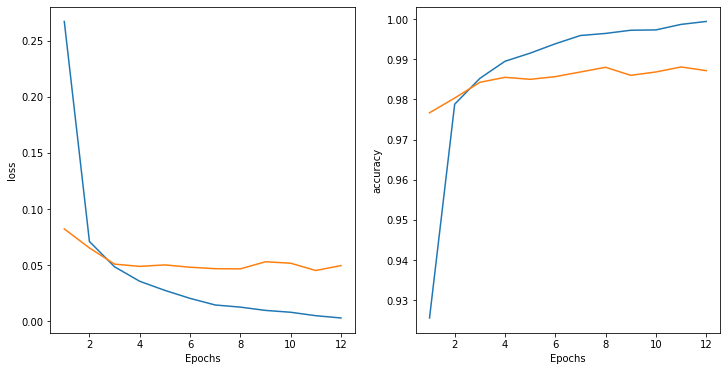

In [ ]:
display.learning_history(trainer.history, 12, 'loss', 'accuracy')